In [ ]:
from ecotools.pi_client import pi_client
pi = pi_client(username = r'ad3\sbharadw')

In [ ]:
tag = pi.search_by_point(['aiTIT4045'])
data = pi.get_stream_by_point(tag, start='2021-01-01', end='2021-02-01', interval='1h', calculation='summary')

In [ ]:
import sys
print(sys.path)

### Local Data Loading

In [ ]:
# file_path = 'data/pes kbtu.xlsx'
# data = pd.read_excel(file_path, header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
# print(data.columns)

### PI Data Loading

In [5]:
# pi = pi_client(username=r'ad3\sbharadw')
tags = pi.search_by_point(['*ghau*flex**'])

tags

['Ghausi_Hall_Flexim/Chilled_Water',
 'Ghausi_Hall_Flexim/Chilled_Water_Demand',
 'Ghausi_Hall_Flexim/Chilled_Water_Return_Temp',
 'Ghausi_Hall_Flexim/Chilled_Water_Supply_Temp',
 'Ghausi_Hall_Flexim/Chilled_Water_Volumetric_Flow',
 'Ghausi_Hall_Flexim/Chilled_Water_Volumetric_Positive_Totalizer',
 'Ghausi_Hall_Flexim_Chilled_Water_Usage']

In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from ecotools.pi_client import pi_client
from ecotools import mnv

print(mnv.version)  # Last updated for mnv v2.0.1

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y
Version 2.0.1


In [9]:
tags = 'Chemistry_ChilledWater_Demand_kBtu'

#### Pull tags

In [10]:
start = '2017-01-01'
end = '*'
interval = '1h' # Can be "min" "h" "d"
calculation = 'summary'
weight = 'TimeWeighted'

data = pi.get_stream_by_point(tags, start=start, end=end, interval=interval, calculation=calculation, _weight=weight)

print(data.head())

10:41:18: Sending API request... Chunk 1 of 1
10:41:22: Response recieved for 1 tags! (3.39)
                     Chemistry_ChilledWater_Demand_kBtu
Timestamp                                              
2017-01-01 00:00:00                                 NaN
2017-01-01 01:00:00                                 NaN
2017-01-01 02:00:00                                 NaN
2017-01-01 03:00:00                                 NaN
2017-01-01 04:00:00                                 NaN


# Data Section

In [1]:
# dataParams [do not edit line]
dataParams = {'column': 0,
              'IQRmult' : 3.0,
              'IQR' : False,
              'floor': -1,
              'ceiling': 40000000,
              'resample_rate' : 'D', #'D' for daily 'H' for hourly
              'oat_source' : 'pi', #'self' or 'file' or 'pi'
              'oat_name' : 'aiTIT4045', #Name of OAT column if OATsource is 'self'
              'slice_type' : 'ranges', #half, middate, ranges
              'mid_date' : '2017-01-01', #only needed with sliceType : 'middate'
              'date_ranges' : ['2017-10-29', '2018-10-29', '2018-10-30', '2021-03-11'], #only needed with sliceType : 'ranges'
             }

### Data Cleaning

In [2]:
dk = mnv.data_keeper(data, dataParams)
dk.default_clean()

# Plots
dk.outlier_plot()
dk.resampled_plot()
dk.pre_post_plot()

NameError: name 'mnv' is not defined

# Modeling Section

In [28]:
# modelParams [do not edit line]
modelParams = {'var': ['CDH', 'HDH', 'C(weekday)'],
               'train_test_split': 'random',
               'random_state': 4291990,  #Good idea to use a seed value so folds consitent between runs
               'test_size': 0.20,
               'var_combinations': [['', 'CDH', 'CDH2'], ['', 'HDH', 'HDH2'], '', 'C(weekday)']
              }

In [29]:
dk.pre 

,Chemistry_ChilledWater_Demand_kBtu,HDH,CDH,HDH2,CDH2,year,month,dayofmonth,hour,minute,dayofweek,weekofyear,daytime,weekday,saturday,sunday
Timestamp,,,,,,,,,,,,,,,,
2018-01-02,570.651180,88.136638,0.000000,802.629254,0.000000,2018,1,2,0,0,1,1,0,1,0,0
2018-01-03,1332.840561,286.836501,0.000000,3670.963147,0.000000,2018,1,3,0,0,2,1,0,1,0,0
2018-01-04,3062.506700,225.389222,0.000000,2426.801047,0.000000,2018,1,4,0,0,3,1,0,1,0,0
2018-01-05,1692.209681,177.066896,0.000000,1480.494213,0.000000,2018,1,5,0,0,4,1,0,1,0,0
2018-01-06,1669.146497,294.531946,0.000000,3903.777903,0.000000,2018,1,6,0,0,5,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-25,0.000000,74.302617,128.842500,536.157957,1865.132311,2018,10,25,0,0,3,43,0,1,0,0
2018-10-26,26582.974831,82.105878,112.052726,695.541976,1313.491903,2018,10,26,0,0,4,43,0,1,0,0
2018-10-27,24794.496048,61.767603,109.937514,426.179244,1389.599898,2018,10,27,0,0,5,43,0,0,1,0


### Many Linear Models

Entering run_all_linear()...

... run_all_linear() complete
       AIC       AR2        R2    cvrmse    post_diff                      var
3  4799.73  0.849108  0.922022   0.23042 -5.79086e+06                CDH + HDH
4  4800.24  0.848817  0.922141  0.230244 -5.78209e+06   CDH + HDH + C(weekday)
5  4811.54  0.841508  0.917919  0.236404 -5.63915e+06               CDH + HDH2
6  4811.81  0.841171  0.918028  0.236247 -5.63174e+06  CDH + HDH2 + C(weekday)
2  4826.34  0.829505  0.911402   0.24561 -5.43556e+06         CDH + C(weekday)


/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


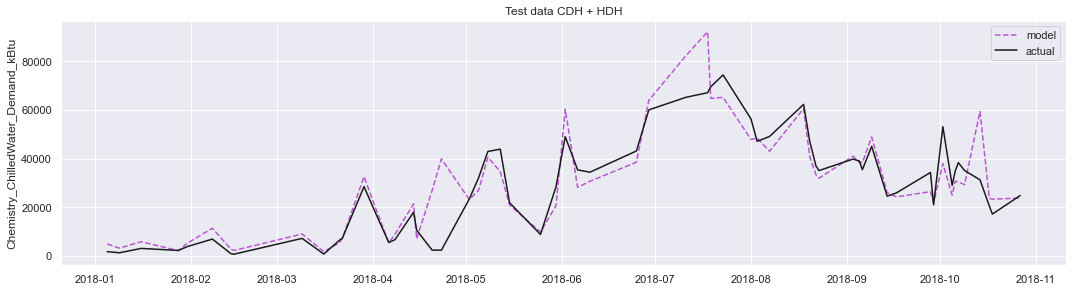

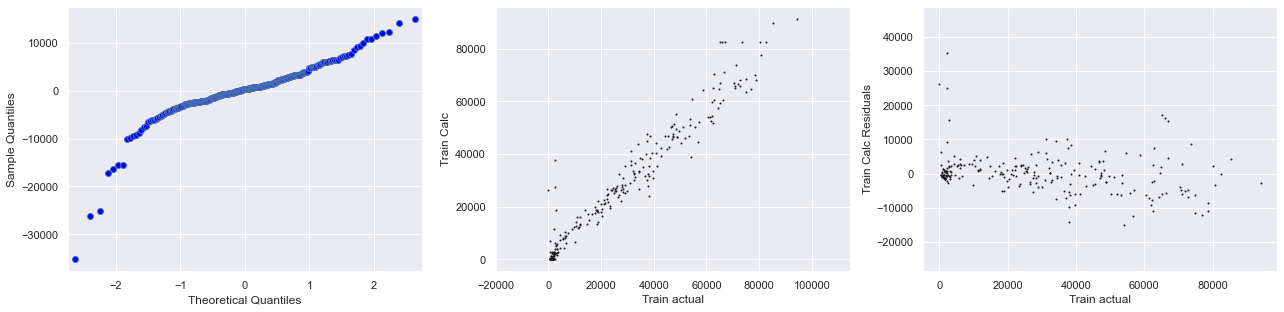

/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


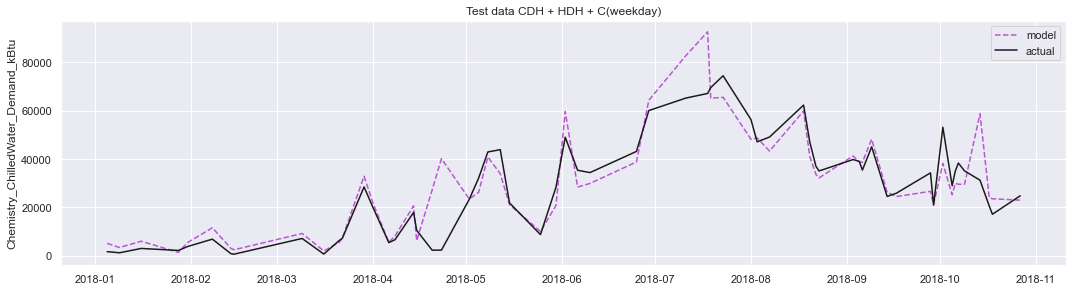

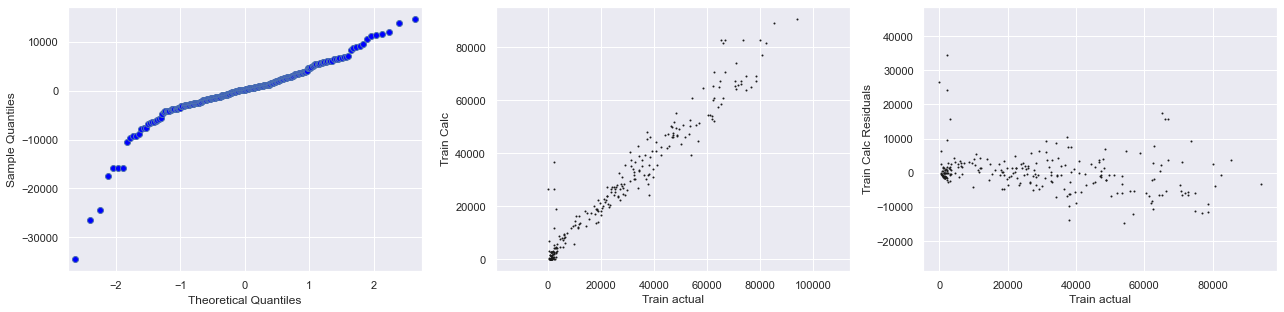

In [30]:
# Run All Linear [do not edit line]
allmod = mnv.many_ols(dk.pre, dk.post, modelParams)
allmod.run_all_linear()

print(allmod.stats_pool[0:5])  # Display top stats
allmod.plot_pool(2)  # Visualize top models
# Set the modelParam "var" to the 'best' model from run_all_linear()
modelParams['var'] = allmod.stats_pool.iloc[0]['var']

### Single Linear Model

            VIF
const  8.176121

Kfold
        AR2           mse  pct. of mean
0  0.943405  3.314946e+07     77.224721
1  0.924633  4.006390e+07     93.332532
2  0.917010  4.612832e+07    107.460159
3  0.912990  4.657959e+07    108.511432
4  0.910236  4.870860e+07    113.471161


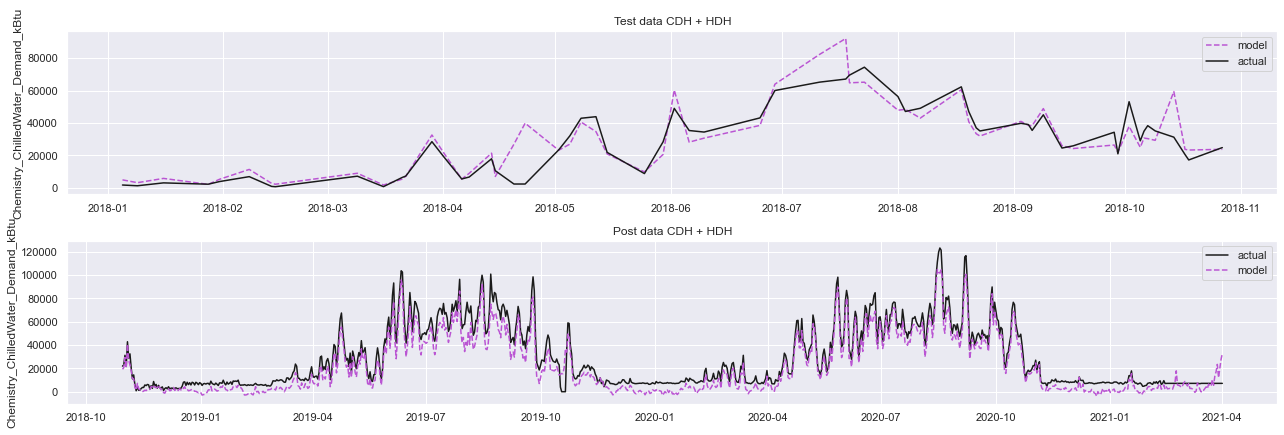

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Chemistry_ChilledWater_Demand_kBtu   R-squared:                       0.944
Model:                                            OLS   Adj. R-squared:                  0.943
Method:                                 Least Squares   F-statistic:                     1976.
Date:                                Wed, 06 Oct 2021   Prob (F-statistic):          1.04e-147
Time:                                        11:15:01   Log-Likelihood:                -2396.9
No. Observations:                                 238   AIC:                             4800.
Df Residuals:                                     235   BIC:                             4810.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8750.9844   1077.793      8.119      0.000    6627.613    1.09e+04
CDH          148.5801      3.883     38.262      0.000     140.930     156.231
HDH          -21.9262      3.965     -5.530      0.000     -29.738     -14.114
==============================================================================
Omnibus:                      116.918   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.261
Skew:                          -1.773   Prob(JB):                    2.16e-193
Kurtosis:                      11.769   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
modelParams['commodity_rate'] = 0.0061

mod = mnv.ols_model(dk.pre, dk.post, modelParams)
mod.calculate_kfold()
mod.calculate_vif()

print(mod.vif[mod.vif['VIF'] > 5])

print('\nKfold')
print(mod.kfold_stats)

mod.model_plot()
plt.show() # Show plot before Stats summary
mod.Fit.summary()

# Savings

          Energy Savings Dollar Savings       Start         End
Actual      -5.79086e+06       -35324.2  2018-10-30  2021-04-01
Predicted    -2.0164e+06         -12300  2018-01-02  2018-10-29


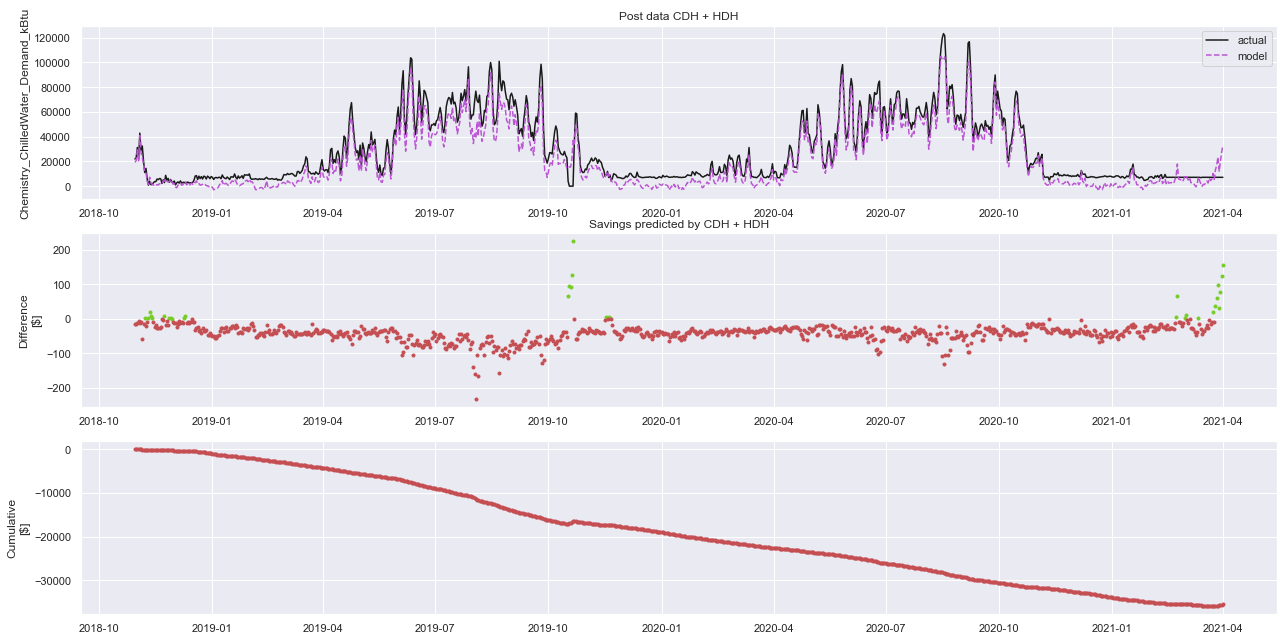

In [32]:
mod.generate_savings_summary(prediction='pre')
print(mod.savings_summary)

mod.savings_plot(yaxis='dollars')
mod.calculate_F_uncertainty()

<AxesSubplot:xlabel='Timestamp'>

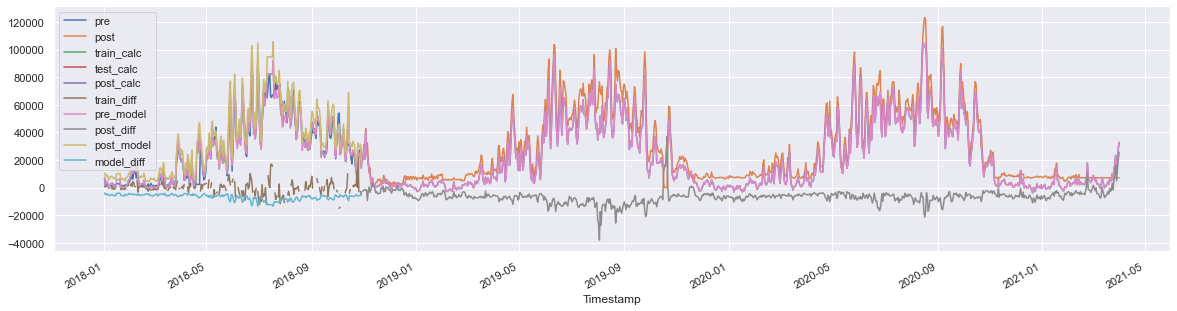

In [33]:
mod.data.plot(figsize=(20,5))

### Creating an Archive

#### Make sure to save (Ctrl + S !) before running this cell !

In [34]:
# Create Archive [do not edit line]
## Only run this section when you're confident in the model and wish to save it
import nbformat
from ecotools.mnv.archive import airtable_archive, remove_nb_outputs

notebook_data = nbformat.read(fp="MnV Tool.ipynb", as_version=4)

remove_nb_outputs(notebook_data)
airtable_archive(dk, mod, notebook=notebook_data, airtable_data={})